<a href="https://colab.research.google.com/github/zzoobro/tongteuk/blob/main/MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------
# Predict survival on the Titanic
-----------

## Load dataset

Import library

In [1]:
from google.colab import files
import io
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시

Load train dataset

In [2]:
# upload the train dataset

file_uploaded = files.upload()

Saving train.csv to train (2).csv


In [3]:
# save the train dataset as 'train'

train = pd.read_csv(io.BytesIO(file_uploaded['train.csv']))

Load test dataset

In [4]:
# upload the test dataset

file_uploaded = files.upload()

Saving test.csv to test (2).csv


In [5]:
# save the test dataset as 'test'

test = pd.read_csv(io.BytesIO(file_uploaded['test.csv']))

Load test label

In [6]:
# upload the test label

file_uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv


In [7]:
# save the test dataset as 'test'

test_label = pd.read_csv(io.BytesIO(file_uploaded['gender_submission.csv']))

## brief show of data

  - PassengerId : Id of passenger
  - Survived : If passenger survived 1 or 0
  - Pclass : Class of ticket(1=1st, 2=2nd, 3=3rd)
  - Sex : male or female
  - Age : Age in years
  - SibSp : # of siblings and spouses aboard together
  - Parch : # of parents and children aboard together
  - Ticket : Ticket number
  - Fare : Passenger fare
  - Cabin : Cabin number
  - Embarked : Port of embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## data cleaning

There are some variables that seems not important to predict passengers's survival

ex. PassengerId, Name, Ticket

So we can delete these variables from our data

In [9]:
# delete the variables that seems not important to predict passenger;s survival

train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Finding Missing values

  - Age : There are 177 Missing values, and we need to delete this observations.
  - Emabarkded : There are 2 Missing values, and we need to delete this observations.
  - Cabin : There are 687 Missing values. It is large number. So drop this variable instead delete the missing observation.

In [10]:
for col in list(train.columns):
  NA_cnt = sum(pd.isnull(train[col]))
  print('# of NaN in {variable} : {number}'.format(variable=col, number=NA_cnt))

# of NaN in Survived : 0
# of NaN in Pclass : 0
# of NaN in Sex : 0
# of NaN in Age : 177
# of NaN in SibSp : 0
# of NaN in Parch : 0
# of NaN in Fare : 0
# of NaN in Cabin : 687
# of NaN in Embarked : 2


In [11]:
# drop Cabin and Missing observations

train.drop('Cabin', axis=1, inplace=True)
train.dropna(subset=['Age', 'Embarked'], inplace=True)

Change Dtype of categorical variables

In [12]:
train.Survived = train.Survived.astype('category')
train.Pclass = train.Pclass.astype('category')
train.Sex = train.Sex.astype('category')
train.Embarked = train.Embarked.astype('category')

Summary of train

In [13]:
# reset the index of row

train = train.reset_index(drop=True, inplace=False)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    category
 1   Pclass    712 non-null    category
 2   Sex       712 non-null    category
 3   Age       712 non-null    float64 
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 25.5 KB


## Exploratory Data Analysis

Import library 

In [15]:
from plotnine import *

Survival seems to be depending on Pclass.

Check it by plotting.

***Comparing the proportion of Survival in Pclass 1 and that of Pclass 3, proportion of Survival in Pclass 1 is much higher than in Pclass 3.***

***Pclass seems to be important variable for predicting Survival.***

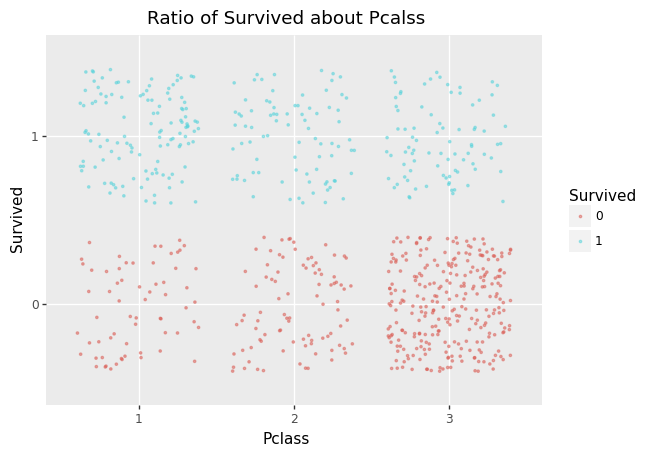

<ggplot: (8776092742205)>

In [16]:
(
    ggplot(train, aes(x='Pclass', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Pcalss')
)

Survival seems to be depending on Sex.

Check it by plotting.

***Comparing the proportion of Survival on female and that of male, proportion of Survival on female is much higher than on male.***

***Sex seems to be important variable for predicting Survival.***

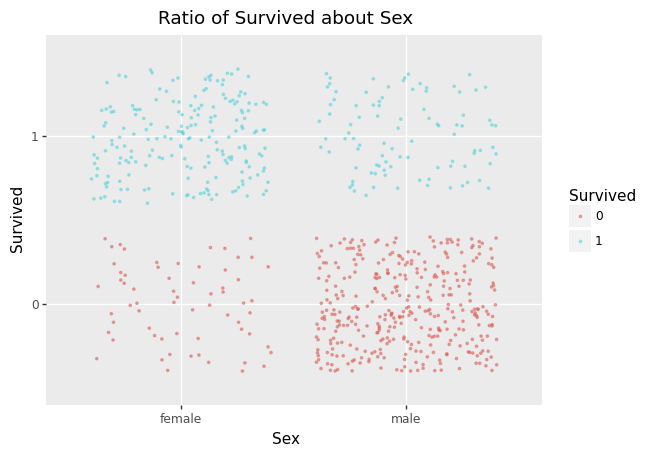

<ggplot: (8776092679245)>

In [17]:
(
    ggplot(train, aes(x='Sex', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Sex')
)

Survival seems to be depending on Age.

Check it by plotting.

***Comparing the proportion of Survival on Age, proportion of Survival on younger group is much higher than on older group.***

***Age seems to be important variable for predicting Survival.***

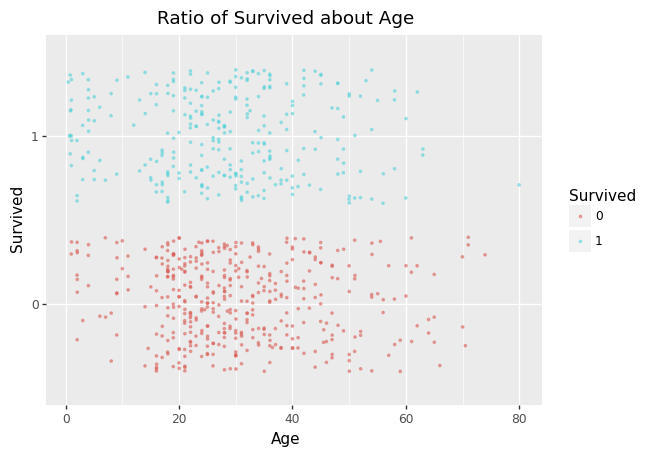

<ggplot: (8776128678661)>

In [18]:
(
    ggplot(train, aes(x='Age', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Age')
)

In [19]:
# To see the effect of Age, categorizing Age to Age_categ

train['Age_categ'] = 0

train.loc[train[ train.Age<10 ].index, 'Age_categ'] = '1+th'

for i in range(10):
  if i == 0:
    categ_name = '1+th'
    train.loc[train[ (train.Age>=10*i) & (train.Age<10*(i+1)) ].index, 'Age_categ'] = categ_name
  elif i == 9:
    categ_name = '90+th'
    train.loc[train[ train.Age>=10*i ].index, 'Age_categ'] = categ_name
  else:
    categ_name = '{}th'.format(10*i)
    train.loc[train[ (train.Age>=10*i) & (train.Age<10*(i+1)) ].index, 'Age_categ'] = categ_name

train.Age_categ = train.Age_categ.astype('category')

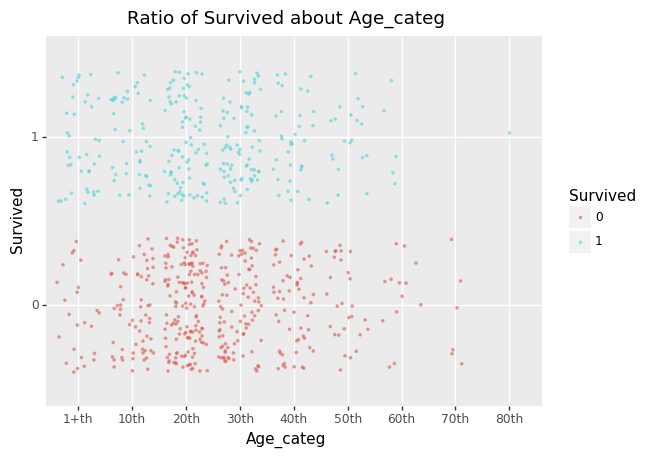

<ggplot: (8776092730685)>

In [20]:
(
    ggplot(train, aes(x='Age_categ', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Age_categ')
)

Survival seems to be depending on SibSp.

Check it by plotting.

***Proportion of Survived is high when SibSp is 1, 2 or 3.***

***If SibSp is 0 or more than 3, proportion of Survived seems low.***

***SibSp seems to be important variable for predicting Survival.***

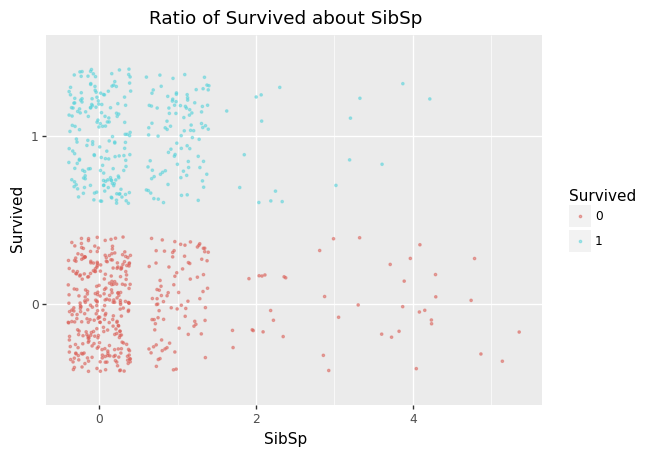

<ggplot: (8776090782041)>

In [21]:
(
    ggplot(train, aes(x='SibSp', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about SibSp')
)

Survival seems to be depending on Parch.

Check it by plotting.

***Proportion of Survived is high when Parch is under 3.***

***If Parch is more than 3, proportion of Survived seems low.***

***Parch seems to be important variable for predicting Survival.***

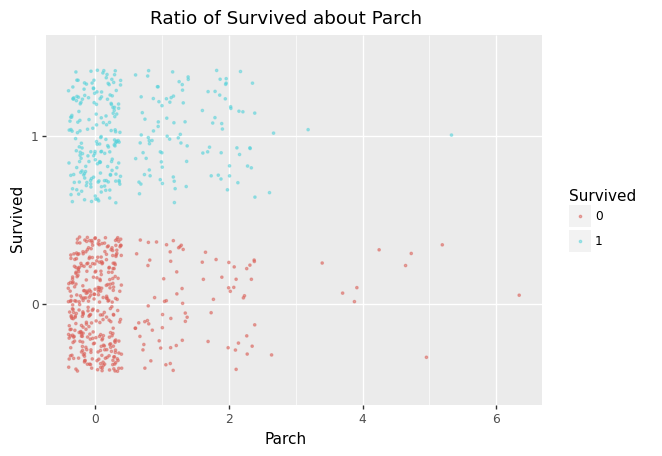

<ggplot: (8776090782125)>

In [22]:
(
    ggplot(train, aes(x='Parch', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Parch')
)

Survival seems to be depending on Fare.

Check it by plotting.

***Proportion of Survived is high when Fare is high. Fare seems to be important variable for predicting Survival.***

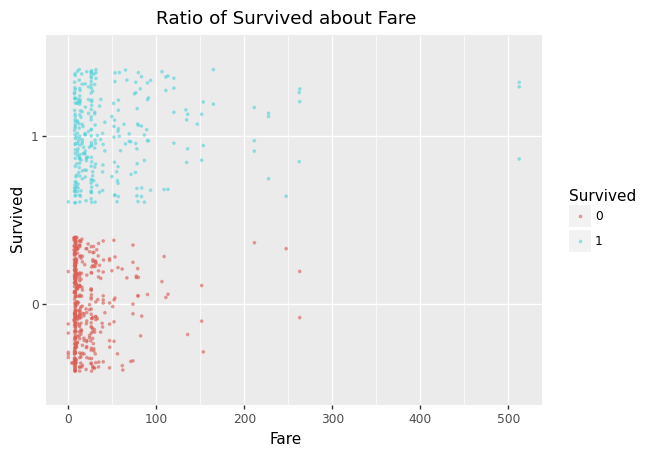

<ggplot: (8776090630853)>

In [23]:
(
    ggplot(train, aes(x='Fare', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Fare')
)

The effect of Emabarked to Survived is ambigous.

Check it by plotting.

***It looks like proportion of Survived is higher on class 'C' than on class 'Q' or 'S'. But it is not sure.***

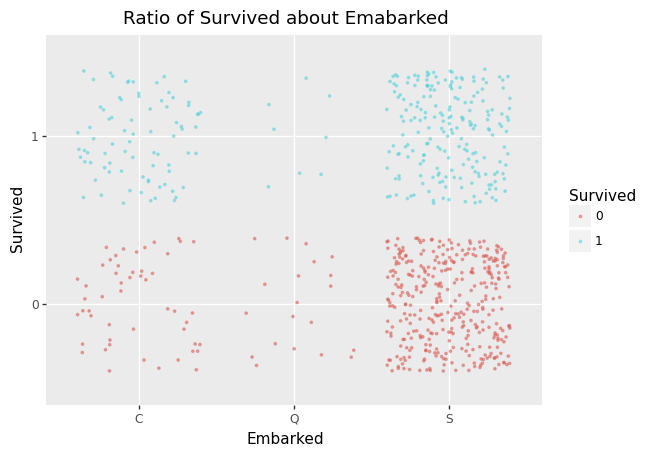

<ggplot: (8776090603185)>

In [24]:
(
    ggplot(train, aes(x='Embarked', y='Survived', color='Survived'))
    + geom_jitter(size=0.5, alpha=0.5)
    + labs(title = 'Ratio of Survived about Emabarked')
)

## Additional EDA

The distributions of Fare on Embarked are different.

***Fare of 'C' is most expensive, and fare of 'Q' is cheapest.***

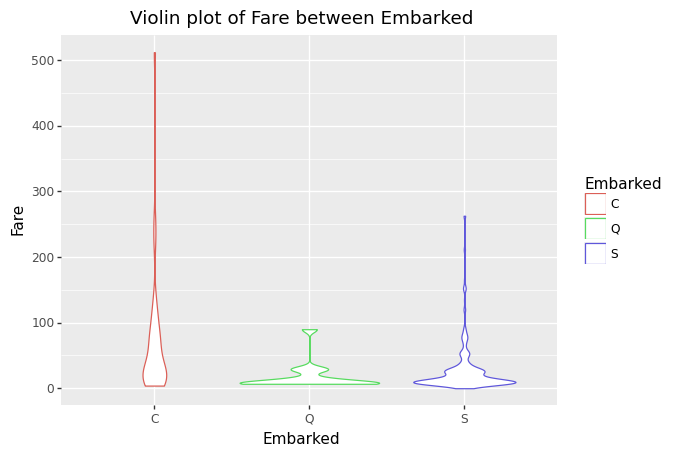

<ggplot: (8776090576441)>

In [25]:
(
    ggplot(train, aes(x='Embarked', y='Fare', color='Embarked'))
    + geom_violin()
    + labs(title = 'Violin plot of Fare between Embarked')
)

The proportion of Pclass on Embarked are different too.

***The proportion of 1st class ticket is highest on class 'C', and lowest in 'Q'.***

***Also the proportion of 3rd class ticket on class 'Q' and 'S' is much higher than on class 'C'***

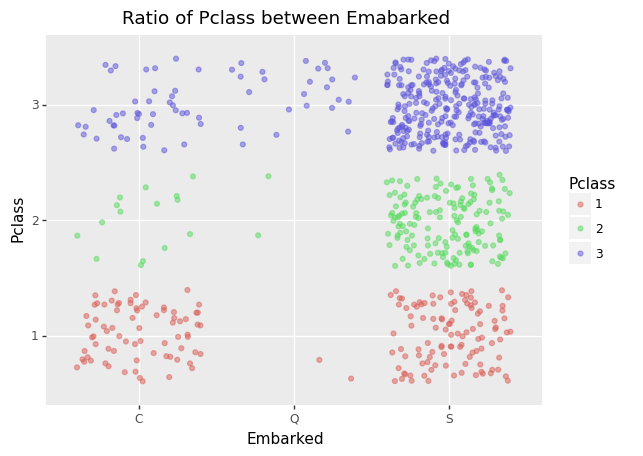

<ggplot: (8776090685413)>

In [26]:
(
    ggplot(train, aes(x='Embarked', y='Pclass', color='Pclass'))
    + geom_jitter(alpha=0.5)
    + labs(title = 'Ratio of Pclass between Emabarked')
)

## Predict Survived

Now we can predict Survived or not by using various variables.

We will check the performance of 4 models.
  - Generalized Linear Model(Logistic Regression)
  - RandomForest Classifier
  - Light-gradient Boosing Machine
  - Voting Classifier

### Making features and label for training dataset

In [27]:
# make dummy variable for machine learning

train['Pclass_1st'] = [1 if x==1 else 0 for x in train.Pclass]
train['Pclass_2nd'] = [1 if x==2 else 0 for x in train.Pclass]

train['Sex_male'] = [1 if x=='male' else 0 for x in train.Sex]

train['Embarked_Chb'] = [1 if x=='C' else 0 for x in train.Embarked]
train['Embarked_Sth'] = [1 if x=='S' else 0 for x in train.Embarked]

In [28]:
# split label and features

Y = train.Survived
X = train.loc[:, ['Pclass_1st', 'Pclass_2nd', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Chb', 'Embarked_Sth']]

In [29]:
# apply min_max scaling to X

import numpy as np

def min_max_scaler(vec):
  min_value = min(vec)
  max_value = max(vec)
  return (np.array(vec) - np.array(min_value)) / (np.array(max_value)-np.array(min_value))

X = X.apply(min_max_scaler, axis=0)

In [30]:
# split data to training and validation 

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=123)

### Model1. GLM

training accuracy = 0.809

validation accuracy = 0.785

In [31]:
# fitting GLM model

from sklearn.linear_model import LogisticRegression

model_glm = LogisticRegression()
model_glm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# check performance using Accuracy score

glm_train_score = model_glm.score(X_train, Y_train)
glm_val_score = model_glm.score(X_val, Y_val)

print('Accuracy of GLM model\n')
print('Accuracy score(train) : {}'.format(round(glm_train_score, 3)))
print('Accuracy score(val)   : {}'.format(round(glm_val_score, 3)))

Accuracy of GLM model

Accuracy score(train) : 0.809
Accuracy score(val)   : 0.785


### Model2. RandomForest

training accuracy = 0.988

validation accuracy = 0.818

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=123)
model_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [34]:
# check performance using Accuracy score

RF_train_score = model_RF.score(X_train, Y_train)
RF_val_score = model_RF.score(X_val, Y_val)

print('Accuracy of RandomForest model\n')
print('Accuracy score(train) : {}'.format(round(RF_train_score, 3)))
print('Accuracy score(val)   : {}'.format(round(RF_val_score, 3)))

Accuracy of RandomForest model

Accuracy score(train) : 0.988
Accuracy score(val)   : 0.818


### Model3. LGBM

training accuracy = 0.946

validation accuracy = 0.785

In [35]:
from lightgbm import LGBMClassifier

model_LGBM = LGBMClassifier(random_state=123)
model_LGBM.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
# check performance using Accuracy score

LGBM_train_score = model_LGBM.score(X_train, Y_train)
LGBM_val_score = model_LGBM.score(X_val, Y_val)

print('Accuracy of RandomForest model\n')
print('Accuracy score(train) : {}'.format(round(LGBM_train_score, 3)))
print('Accuracy score(val)   : {}'.format(round(LGBM_val_score, 3)))

Accuracy of RandomForest model

Accuracy score(train) : 0.946
Accuracy score(val)   : 0.785


### Model4. Voting Classifier


training accuracy = 0.938

validation accuracy = 0.818

In [37]:
from sklearn.ensemble import VotingClassifier

model_Vot = VotingClassifier(estimators=[('GLM', model_glm), ('RF', model_RF), ('LGBM', model_LGBM)], voting='soft')
model_Vot.fit(X_train, Y_train)

VotingClassifier(estimators=[('GLM',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                            

In [38]:
# check performance using Accuracy score

Vot_train_score = model_Vot.score(X_train, Y_train)
Vot_val_score = model_Vot.score(X_val, Y_val)

print('Accuracy of RandomForest model\n')
print('Accuracy score(train) : {}'.format(round(Vot_train_score, 3)))
print('Accuracy score(val)   : {}'.format(round(Vot_val_score, 3)))

Accuracy of RandomForest model

Accuracy score(train) : 0.938
Accuracy score(val)   : 0.818


## Interpret model

We can see feature importance from RandomForest Model.

Feature importance indicates that 'how important the variable used to predict lable'

***Age, Sex_male, Fare is important variable to predict Survived in RandomForest Model***

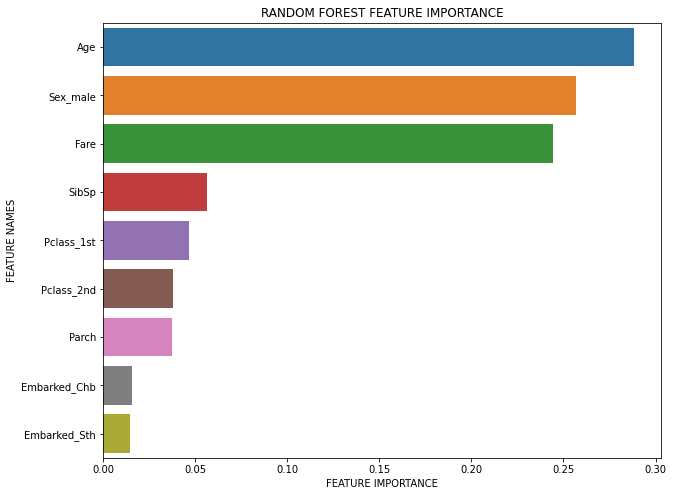

In [39]:
# make feature importance plot

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance, names, model_type):

  feature_importance = np.array(importance)
  feature_names = np.array(names)

  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model_RF.feature_importances_,X_train.columns,'RANDOM FOREST')

## Comparing performance of models

To check the performance score of each models, we can use Cross-Validation method. In label, we have 2 group(Survived or Not). 

So we will use Stratified-Cross-Validation method. It will make our CV folds have same proportion of label.

In [40]:
# set the method of cross-validation method

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

cv_method = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3, random_state=123)

In [41]:
# get the performance score of each model by using stratified-cv method

accuracy_GLM = np.mean(cross_val_score(model_glm, X, Y, cv=cv_method))
accuracy_RF = np.mean(cross_val_score(model_RF, X, Y, cv=cv_method))
accuracy_LGBM = np.mean(cross_val_score(model_LGBM, X, Y, cv=cv_method))
accuracy_Vot = np.mean(cross_val_score(model_Vot, X, Y, cv=cv_method))

(0.6, 0.85)

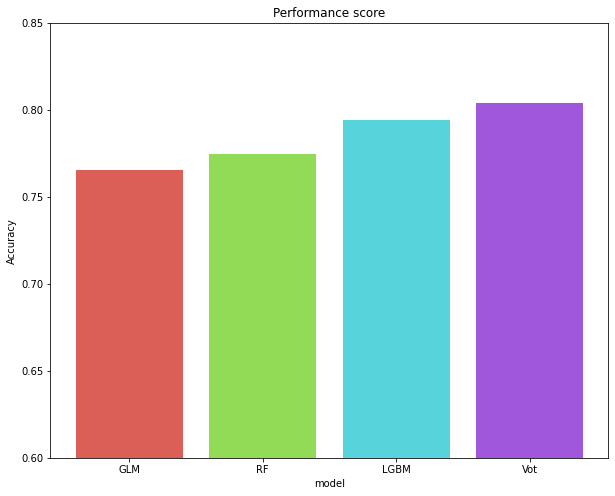

In [42]:
# compare the score of each model

performance = pd.DataFrame({'model':['GLM', 'RF', 'LGBM', 'Vot'], 'Accuracy':[accuracy_GLM, accuracy_RF, accuracy_LGBM, accuracy_Vot]})
performance.model = performance.model.astype('category')


colors = sns.color_palette('hls',len(performance))

plt.figure(figsize=(10,8))
plt.bar(performance.model, performance.Accuracy, color=colors)
plt.title('Performance score')
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.85])

In [43]:
performance

,model,Accuracy
0,GLM,0.765421
1,RF,0.774766
2,LGBM,0.794393
3,Vot,0.803738


## Predict Survived people in test data

In [44]:
# claeaning test data to predict by Voting Classfier Model

test = pd.merge(test, test_label, on='PassengerId', how='left')

test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.dropna(subset=['Age', 'Embarked', 'Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked'], inplace=True)

In [45]:
# make dummy variable to apply machine learning

test['Pclass_1st'] = [1 if x==1 else 0 for x in test.Pclass]
test['Pclass_2nd'] = [1 if x==2 else 0 for x in test.Pclass]

test['Sex_male'] = [1 if x=='male' else 0 for x in test.Sex]

test['Embarked_Chb'] = [1 if x=='C' else 0 for x in test.Embarked]
test['Embarked_Sth'] = [1 if x=='S' else 0 for x in test.Embarked]

In [46]:
# split label and features

Y_test = test.Survived
X_test = test.loc[:, ['Pclass_1st', 'Pclass_2nd', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Chb', 'Embarked_Sth']]

In [47]:
# apply min_max scaling

X_test = X_test.apply(min_max_scaler, axis=0)

In [48]:
# Test Accuracy score of Voting Classifier Model

Accuracy_score = round(model_Vot.score(X_test, Y_test),3)
Accuracy_score

0.87

## Conclusion

According to test Accuracy, Voting Classifier(soft) Model is the best among Generalized Linear Model, RandomForest Model, Light-gradient Boosting Machine.

It means that we can predict someone's Survive in about 87% probability.

It means that our perdiction of Survive will correct about 87% probability.

Also, we know that
  - younger, the probability of Survived higher
  - if male, the probability of Survived higher
  - more expensive the ticket, the probability of Survived higher